#### [ 산점도 그래프 ]
- 두개의 컬럼 (변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [22]:
# [1] 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

In [23]:
font_path = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\DAY_07\MALGUN.TTF"
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [24]:
# [2] 데이터 준비
F_DATA = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\Data\auto_mpg.csv"

In [25]:
# [3] CSV => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)
dataDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [26]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [27]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인

corrSR = dataDF.corr(numeric_only = True)["mpg"]
corrSR

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_7484\168704546.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(dataDF["mpg"], dataDF["weight"], label = round(corrSR[3], 2))


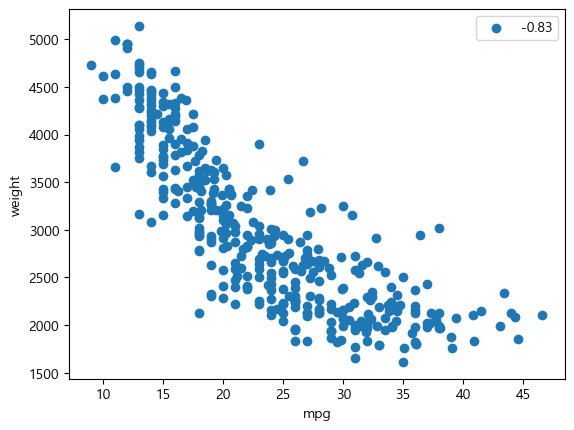

In [28]:
# - [4-2] 시각화
plt.scatter(dataDF["mpg"], dataDF["weight"], label = round(corrSR[3], 2))
plt.xlabel("mpg")
plt.ylabel("weight")
plt.legend()
plt.show()

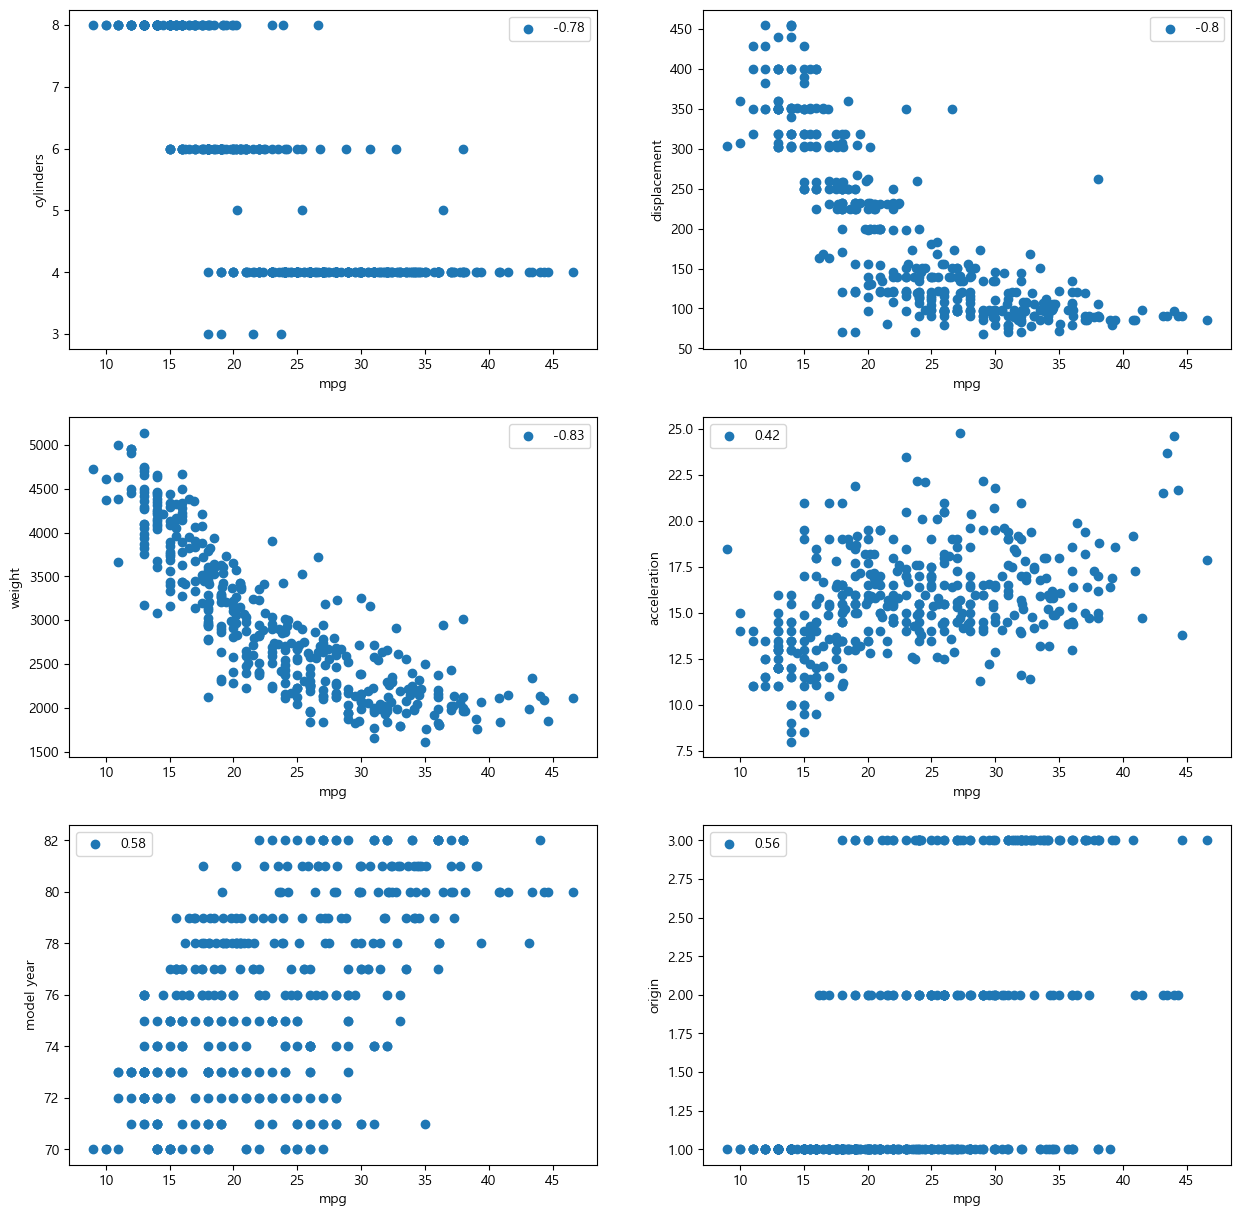

In [29]:
# - [4-3] mpg 컬럼과 다른 컬럼간의 관계 시각화
indexes = corrSR.index[1:]

fig = plt.figure(figsize = (15, 15))
axes = fig.subplots(3, 2)

idx = 0

for i in range(len(axes)):
    for j in range(len(axes[0])):
        axes[i][j].scatter(dataDF["mpg"], dataDF[indexes[idx]], label = round(corrSR.iloc[idx + 1], 2))
        axes[i][j].set_xlabel("mpg"); axes[i][j].set_ylabel(indexes[idx])
        axes[i][j].legend()
        
        idx += 1
    

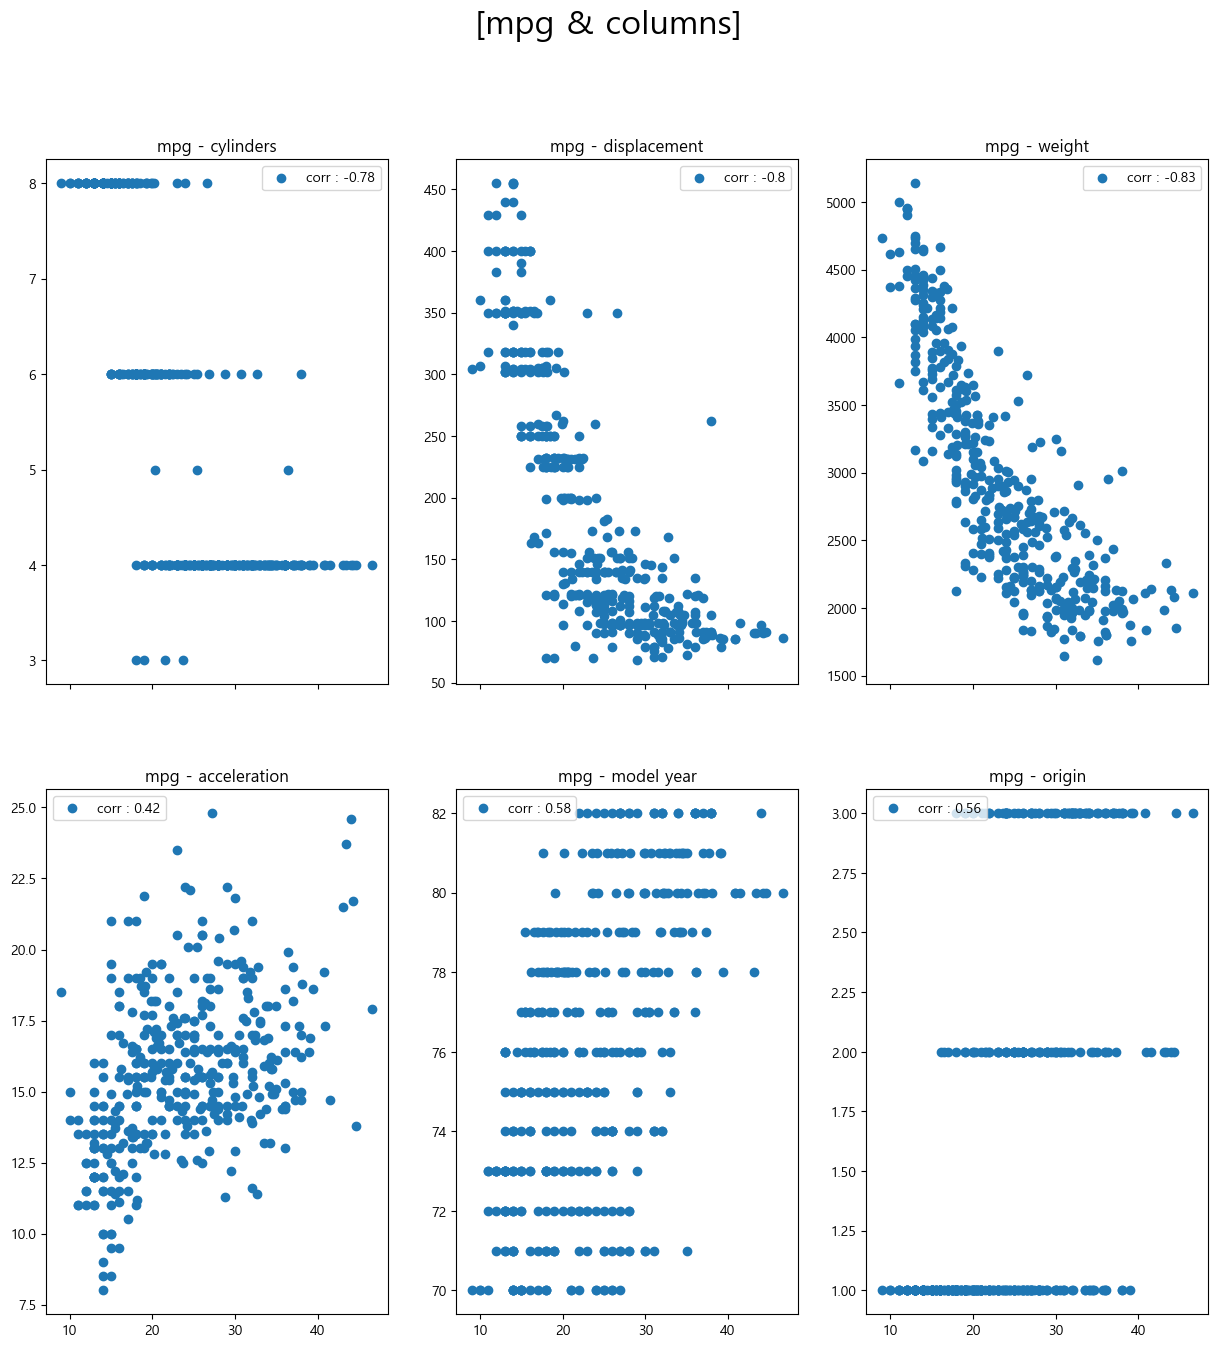

In [30]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
# - (1) 그래프 담을 창 생성
fig = plt.figure(figsize = (15, 15))

# - (2) 그래프 담을 공간 생성 axes
axs = fig.subplots(2, 3, sharex = True)
for row in range(2):
    for col in range(3):
        col_name = corrSR.index[row * 3 + col + 1]
        axs[row, col].scatter(dataDF["mpg"], 
                              dataDF[col_name],
                              label = f'corr : {round(corrSR[col_name], 2)}')
        axs[row, col].legend()
        axs[row, col].set_title(f'mpg - {col_name}')
fig.suptitle("[mpg & columns]", fontsize = 24)
plt.show()

- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수도 반비례 관계

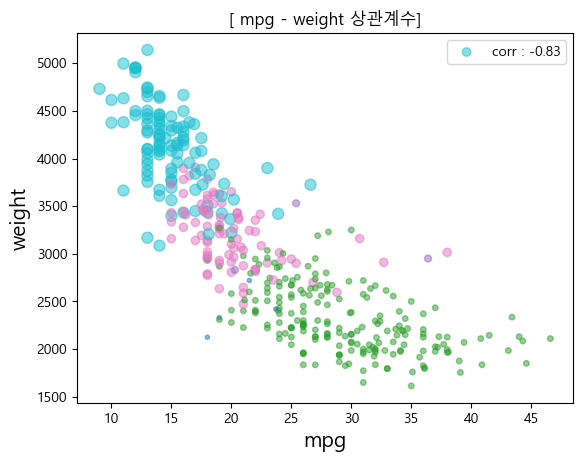

In [51]:
# - mpg와 weight 관계 산점도 (scatter) 시각화

plt.scatter(dataDF["mpg"], dataDF["weight"], s = dataDF["cylinders"] ** 2 , c = dataDF["cylinders"],
             alpha = 0.5, label = f"corr : {round(corrSR.iloc[3], 2)}", cmap = "tab10")
plt.xlabel("mpg", size = 15)
plt.ylabel("weight", size = 15)
plt.title("[ mpg - weight 상관계수]")
plt.legend()
plt.show()

In [36]:
dataDF["cylinders"].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64